# Explore here

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error, r2_score




In [32]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")
df.head()



,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [33]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [34]:
# Verificar tipos de datos y número de valores únicos
print(df.dtypes)
print(df.nunique())


fips                        int64
TOT_POP                     int64
0-9                         int64
0-9 y/o % of total pop    float64
19-Oct                      int64
                           ...   
CKD_prevalence            float64
CKD_Lower 95% CI          float64
CKD_Upper 95% CI          float64
CKD_number                  int64
Urban_rural_code            int64
Length: 108, dtype: object
fips                      3140
TOT_POP                   3074
0-9                       2723
0-9 y/o % of total pop    3136
19-Oct                    2743
                          ... 
CKD_prevalence              43
CKD_Lower 95% CI            39
CKD_Upper 95% CI            46
CKD_number                1894
Urban_rural_code             6
Length: 108, dtype: int64


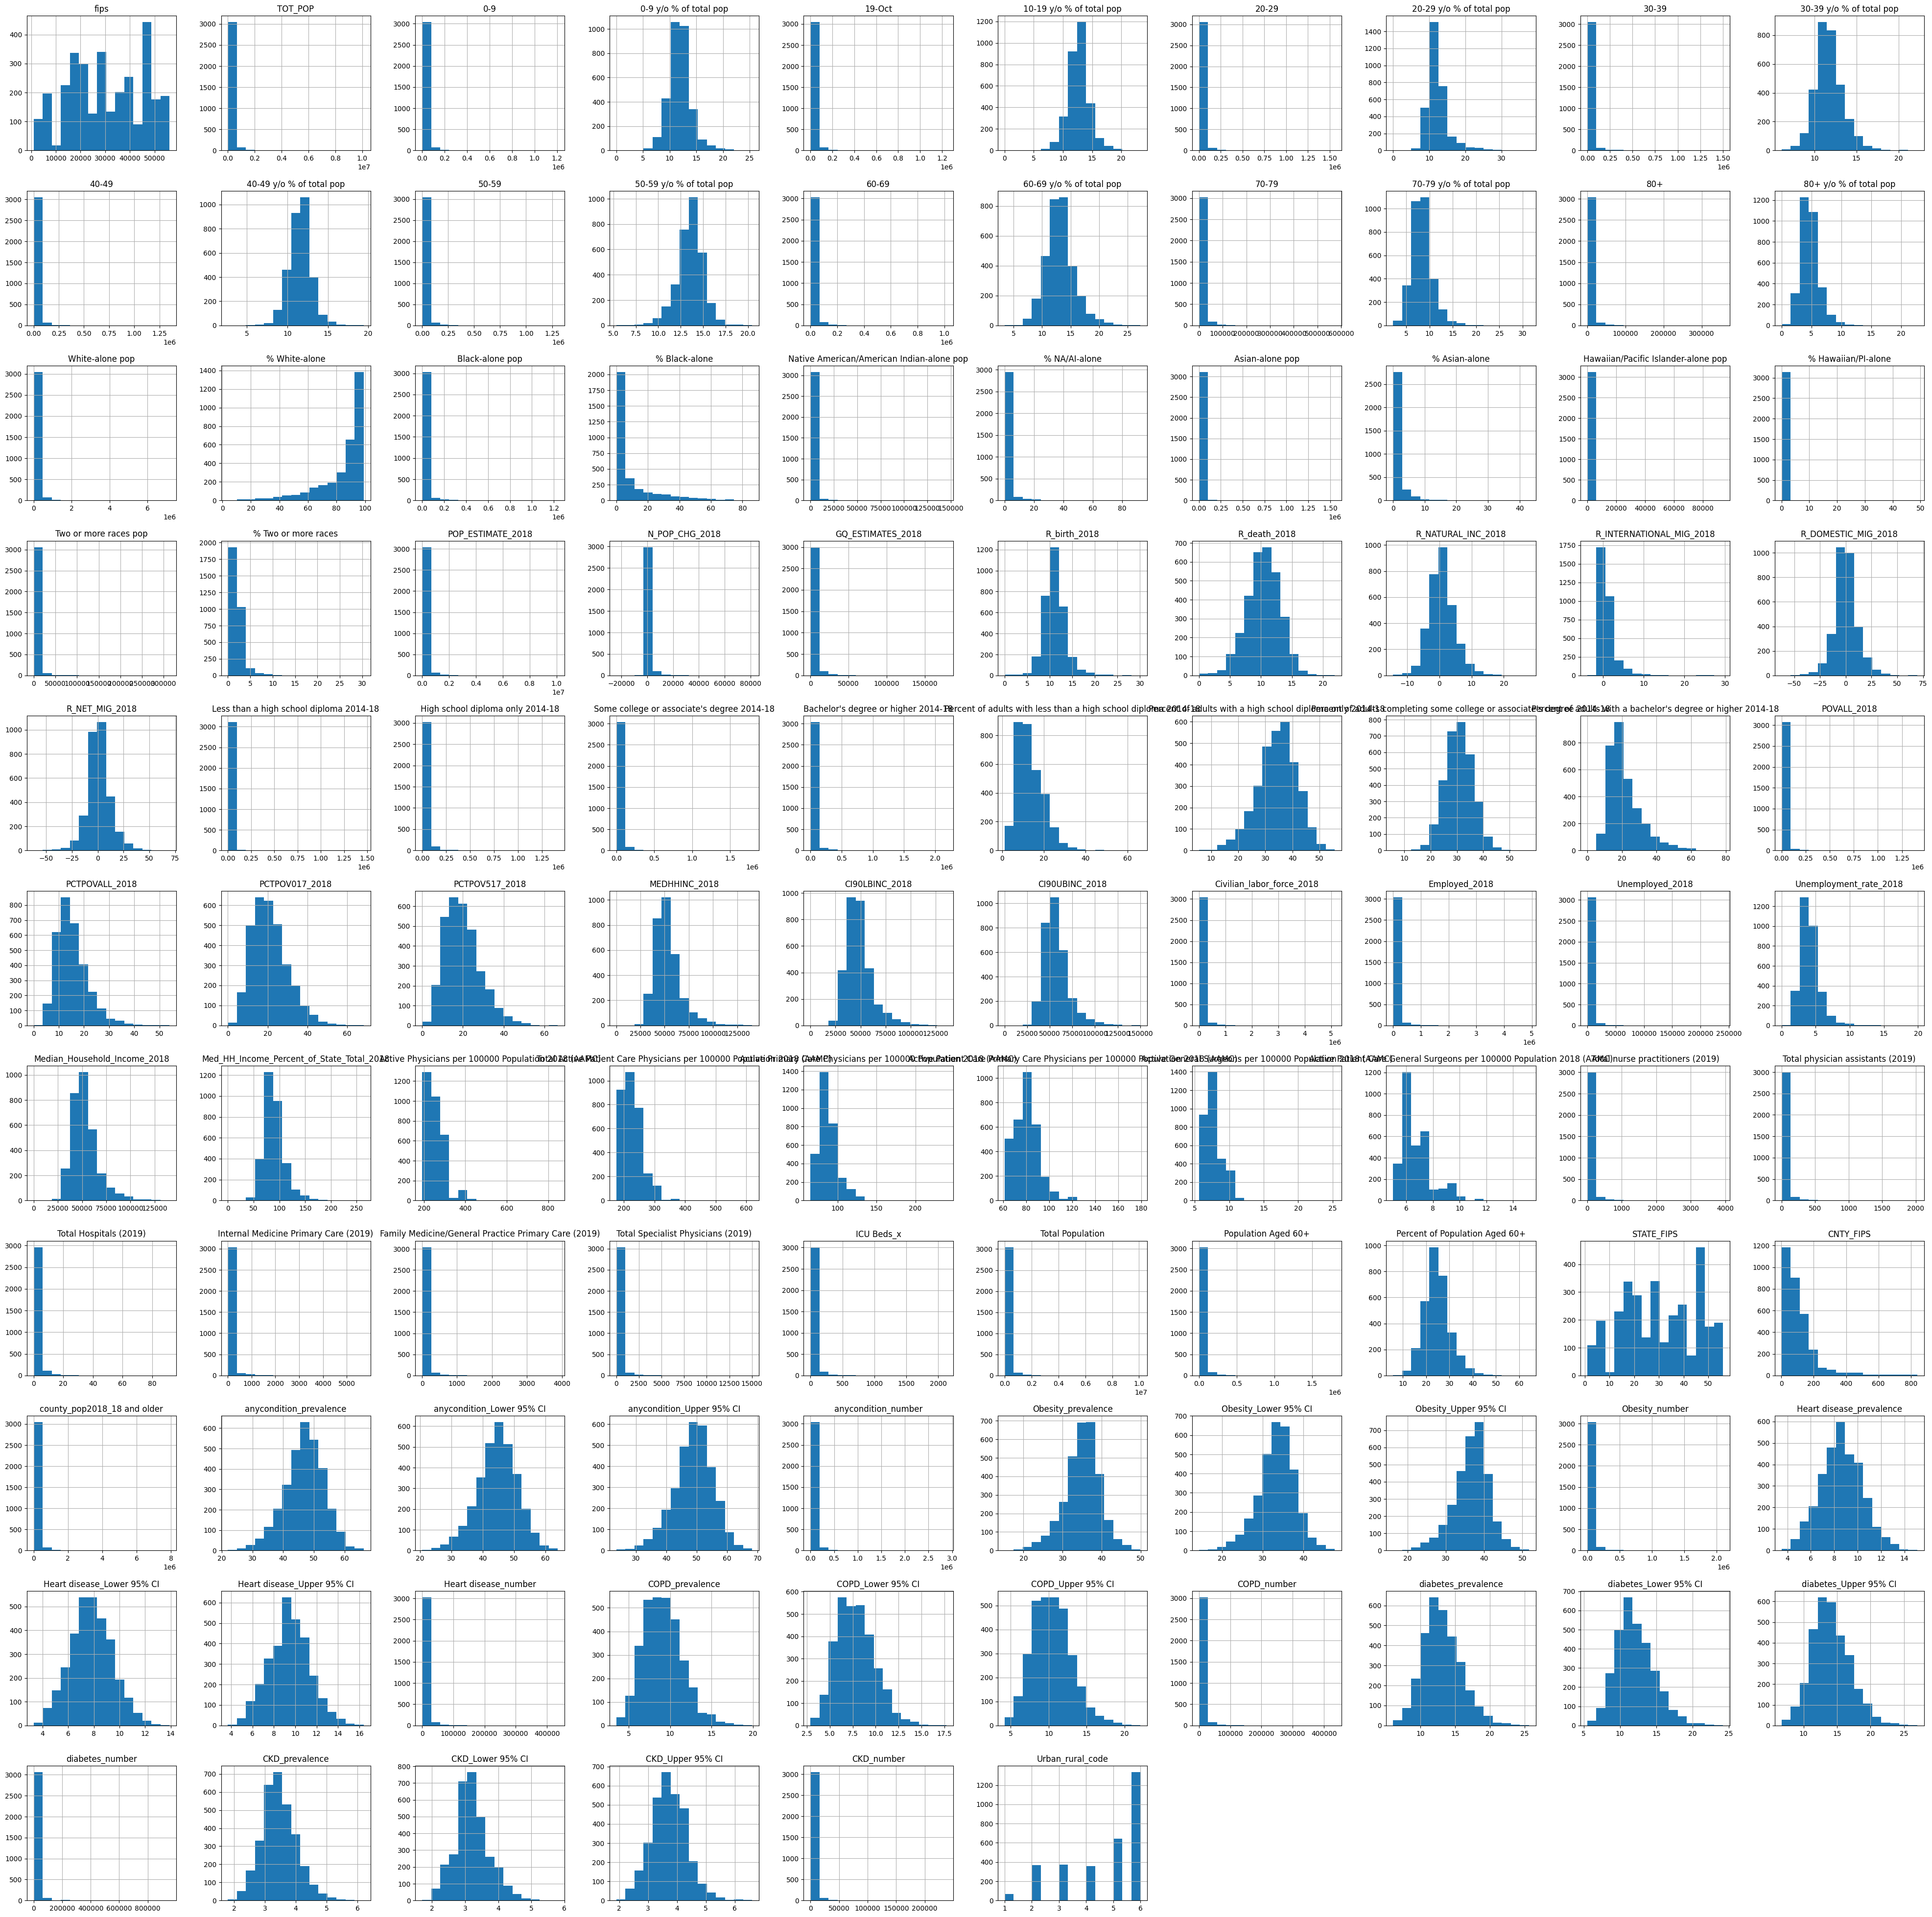

In [35]:
df.hist(figsize=(50, 50), bins=15)
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

data_types = df.dtypes
numeric_columns = [c for c in list(data_types[data_types != "object"].index) if c != "Heart disease_number"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(df[numeric_columns])

# Create a new DataFrame with the scaled numerical variables
df_scal = pd.DataFrame(norm_features, index = df.index, columns = numeric_columns)
df_scal["Heart disease_number"] = df["Heart disease_number"]
df_scal.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Heart disease_number
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865,3345
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,-0.394103,-0.414900,-0.337677,0.376251,-0.433549,-0.393279,-0.343373,0.389791,-0.420704,13414
2,-1.940610,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,2.432709,2.483064,2.317776,-0.183415,1.855312,1.880929,1.777443,-0.204321,0.903618,2159
3,-1.940478,-0.245223,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,0.376846,0.423984,0.299632,-0.229096,-0.257483,-0.203761,-0.180233,-0.242100,-1.745026,1533
4,-1.940346,-0.138966,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,0.156575,0.195197,0.158008,-0.111247,-0.081417,-0.014244,-0.017093,-0.124105,-1.745026,4101


In [37]:
corr_matrix = df_scal.corr()
print("\nMatriz de correlación:")
print(corr_matrix)


Matriz de correlación:
                            fips   TOT_POP       0-9  0-9 y/o % of total pop  \
fips                    1.000000 -0.056079 -0.049580               -0.010586   
TOT_POP                -0.056079  1.000000  0.994010                0.052507   
0-9                    -0.049580  0.994010  1.000000                0.085920   
0-9 y/o % of total pop -0.010586  0.052507  0.085920                1.000000   
19-Oct                 -0.053130  0.994596  0.997487                0.074714   
...                          ...       ...       ...                     ...   
CKD_Lower 95% CI       -0.044576 -0.202895 -0.200512               -0.117138   
CKD_Upper 95% CI       -0.033649 -0.230914 -0.229570               -0.153847   
CKD_number             -0.062322  0.993889  0.985337                0.040384   
Urban_rural_code       -0.008345 -0.428608 -0.423641               -0.050916   
Heart disease_number   -0.060668  0.987511  0.978213                0.033228   

               

Selección de variables

In [38]:
X_train = df_scal.drop(["Heart disease_number"], axis = 1)
y_train = df_scal["Heart disease_number"]

X_test = df_scal.drop(["Heart disease_number"], axis = 1)
y_test = df_scal["Heart disease_number"]

Regresión lineal

In [39]:
# modelo
reg_lin = LinearRegression()

# entrenamiento
reg_lin.fit(X_train, y_train)

# predicción
y_pred = reg_lin.predict(X_test)
y_pred

# metricas
mse_rl = mean_squared_error(y_test, y_pred)
rmse_rl = np.sqrt(mse_rl)
r2_rl = r2_score(y_test, y_pred)

print("MSE: ", mse_rl)
print("RMSE: ", rmse_rl)
print("Coeficiente de determinación: ", r2_rl)

MSE:  120811.46384255339
RMSE:  347.5794352986859
Coeficiente de determinación:  0.9995043825133099


Regularización Lasso

In [40]:
# modelo
reg_lasso = Lasso(alpha = 0.01, max_iter = 1000)

# entrenamiento
reg_lasso.fit(X_train, y_train)

# prediccion
y_pred = reg_lasso.predict(X_test)
y_pred

# metricas
mse_l1 = mean_squared_error(y_test, y_pred)
rmse_l1 = np.sqrt(mse_l1)
r2_l1 = r2_score(y_test, y_pred)

print("MSE: ", mse_l1)
print("RMSE: ", rmse_l1)
print("Coeficiente de determinación: ", r2_l1)

MSE:  214003.72305737832
RMSE:  462.60536427648384
Coeficiente de determinación:  0.9991220701745469


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.380e+08, tolerance: 7.654e+07
  model = cd_fast.enet_coordinate_descent(


Regularización Ridge

In [41]:
# modelo
reg_ridge = Ridge(alpha = 0.1, max_iter = 1000)

# entrenamiento
reg_ridge.fit(X_train, y_train)

# prediccion
y_pred = reg_ridge.predict(X_test)
y_pred

# metricas
mse_l2 = mean_squared_error(y_test, y_pred)
rmse_l2 = np.sqrt(mse_l2)
r2_l2 = r2_score(y_test, y_pred)

print("MSE: ", mse_l2)
print("RMSE: ", rmse_l2)
print("Coeficiente de determinación: ", r2_l2)

MSE:  126398.99436906516
RMSE:  355.5263624108136
Coeficiente de determinación:  0.9994814602032221


Resultado

In [42]:
data = {
    'Modelo': ['Regresión lineal', "Regulación Lasso", "Regulación Ridge"],
    'MSE': [mse_rl, mse_l1, mse_l2],
    'RMSE': [rmse_rl, rmse_l1, rmse_l2],
    'R²': [r2_rl, r2_l1, r2_l2]
}

# Crear el DataFrame
resultados = pd.DataFrame(data)

# Mostrar el DataFrame
print(resultados)

             Modelo            MSE        RMSE        R²
0  Regresión lineal  120811.463843  347.579435  0.999504
1  Regulación Lasso  214003.723057  462.605364  0.999122
2  Regulación Ridge  126398.994369  355.526362  0.999481


In [43]:
# Supongamos que tu DataFrame se llama df y la variable objetivo es 'Heart disease_number'
print(df['Heart disease_number'].describe())


count      3140.000000
mean       5597.593312
std       15615.285499
min           7.000000
25%         798.500000
50%        1814.500000
75%        4376.000000
max      434790.000000
Name: Heart disease_number, dtype: float64


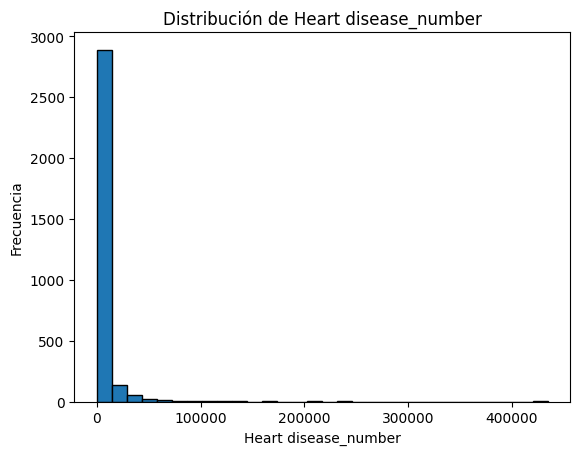

In [44]:
import matplotlib.pyplot as plt

plt.hist(df_scal['Heart disease_number'], bins=30, edgecolor='k')
plt.xlabel('Heart disease_number')
plt.ylabel('Frecuencia')
plt.title('Distribución de Heart disease_number')
plt.show()


El rango de la variable objetivo es bastante grande con lo cual un RMSE de 347 es aceptable teniendo en cuenta la distribución de la variable objetivo!